In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


### 1. Import Dependencies

In [2]:
import os
import numpy as np
import pandas as pd # alias
import seaborn as sns
import matplotlib.pyplot as plt

### 2. basic processing

In [3]:
df = pd.read_csv('data/processed/ChurnModelling_Missing_Values_Handled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f"No of Rows : {len(df)}")

No of Rows : 10000


### 3. outlier detection techniques

#### 3.1 distribution plots

In [5]:
categorical_columns = [
                       'Geography',
                       'Gender', 'HasCrCard',
                       'IsActiveMember', 'Exited'
                        ]

numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary', 'NumOfProducts'
                    ]

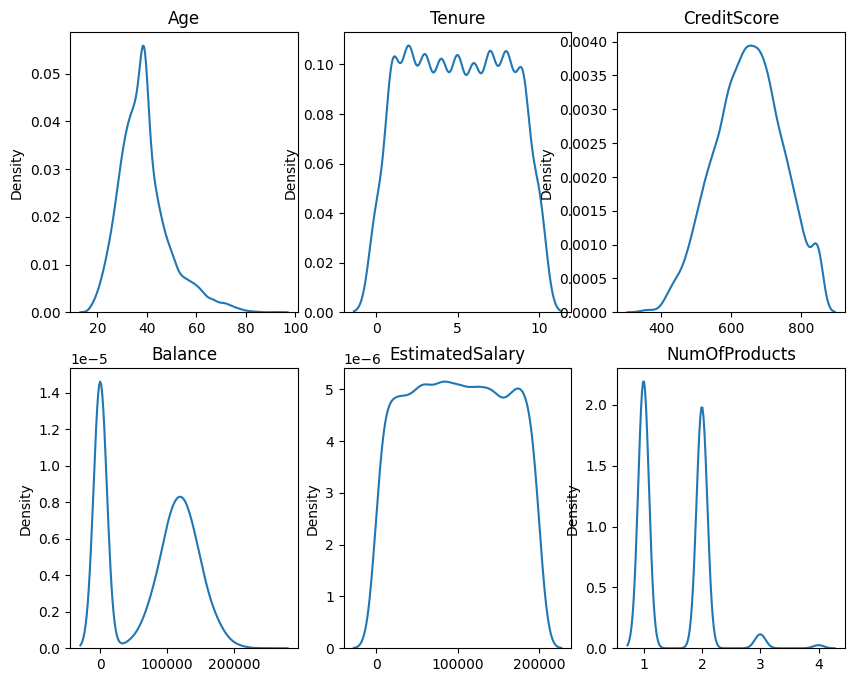

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
                data=df[col],
                ax=axes[idx],
    )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

Bimodal

There are lot of people with 0 balance in the bank account and the people who manage their account has a normal distribution


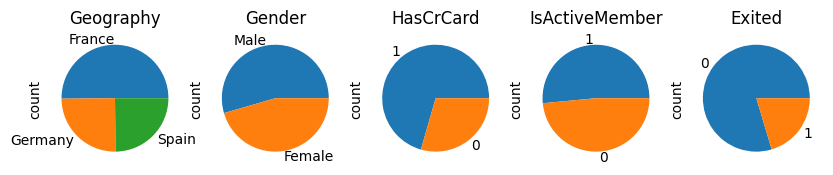

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(10,8))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                                kind= 'pie',
                                ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

#### 3.2 box plots

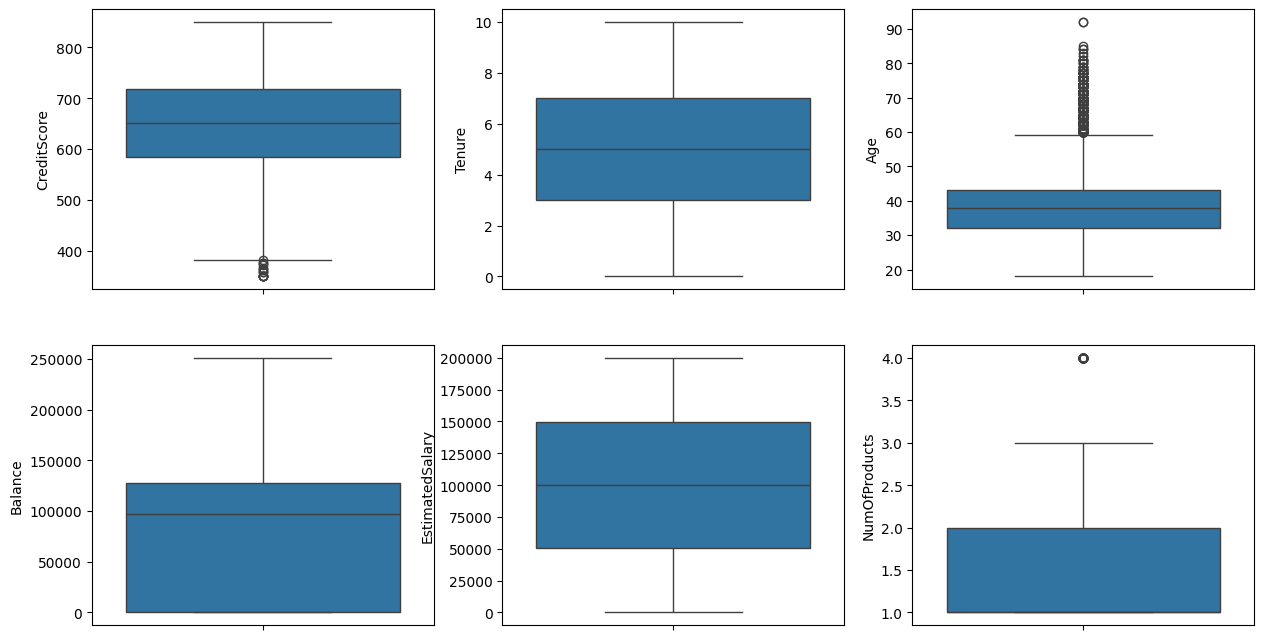

In [8]:
numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary', 'NumOfProducts'
                    ]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(data=df['CreditScore'], ax=axes[0,0])
sns.boxplot(data=df['Tenure'], ax=axes[0,1])
sns.boxplot(data=df['Age'], ax=axes[0,2])
sns.boxplot(data=df['Balance'], ax=axes[1,0])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1,1])
sns.boxplot(data=df['NumOfProducts'], ax=axes[1,2])

plt.show()

#### 3.3 empirical rule / 3-sigma rule

In [9]:
def find_anomaly(data):
    
    mean = data.mean()
    std = data.std()

    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std
    
    return (data > upper_bound) | (data < lower_bound)


In [10]:
numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary'
                    ]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage}% )")

Age : 144 outliers (0.014% )
Tenure : 0 outliers (0.0% )
CreditScore : 8 outliers (0.001% )
Balance : 0 outliers (0.0% )
EstimatedSalary : 0 outliers (0.0% )


#### 3.4 IQR Method 

In [11]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    return (data > upper_bound) | (data < lower_bound)



In [12]:
numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary'
                    ]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Age : 501 outliers (0.05 %)
Tenure : 0 outliers (0.0 %)
CreditScore : 15 outliers (0.002 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)


In [13]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] > 1]
outlier_mask_log

,Age,Tenure,CreditScore,Balance,EstimatedSalary,Outlier Count
8762,True,False,True,False,False,2


In [14]:
df.to_csv('data/processed/ChurnModelling_Outliers_Handled.csv', index=False)